In [1]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
insurance_data  = pd.read_csv('insurance.csv') # Import the dataset named 'insurance.csv'
insurance_data.head()  # view the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [174]:
insurance_data.shape # getting the shape of dataframe

(1338, 7)

In [3]:
insurance_data.dtypes # getting the datatypes of the attributes of the dataframe

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
duplicates = insurance_data.duplicated() #Identify  if any duplicates records is present in the dataframe
sum(duplicates) 

1

In [6]:
insurance_data[duplicates]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
insurance_data = insurance_data.drop_duplicates() # removing the duplicate column

In [8]:
duplicates = insurance_data.duplicated()
sum(duplicates)

0

In [9]:
insurance_data.isnull().values.any()   # Checking for missing values

False

In [10]:
insurance_data.isnull().sum().sum()

0

In [11]:
insurance_data.describe() #5 point summary of numerical attributes

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


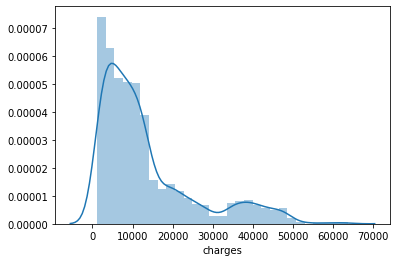

In [12]:
sns.distplot(insurance_data['charges'])  #Distribution of Charges attribute

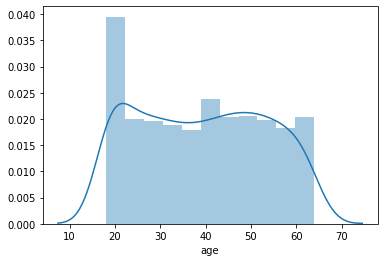

In [13]:
sns.distplot(insurance_data['age'])  #Distribution of age attribute

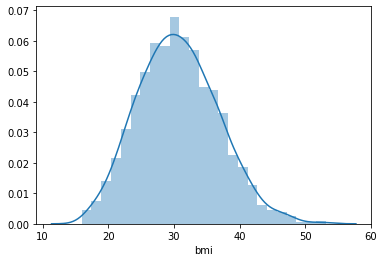

In [14]:
sns.distplot(insurance_data['bmi'])  #Distribution of bmi attribute

In [15]:
insurance_data['charges'].skew() #skewness in charges attribute

1.5153909108403483

In [16]:
insurance_data['age'].skew() #skewness in age attribue

0.054780773126998195

In [17]:
insurance_data['bmi'].skew() #skewness in bmi attribue

0.28391419385321137

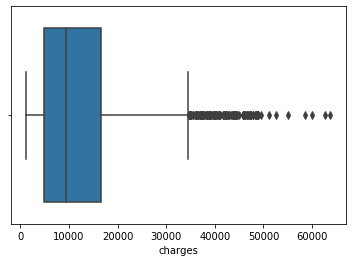

In [18]:
sns.boxplot(x=insurance_data['charges'])   # box plot for checking outliers in the charges column

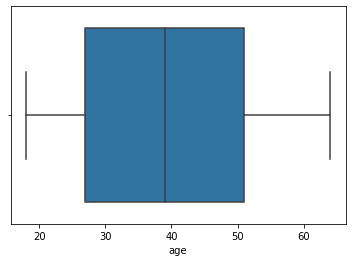

In [19]:
sns.boxplot(x=insurance_data['age'])   # box plot for checking outliers in the age column

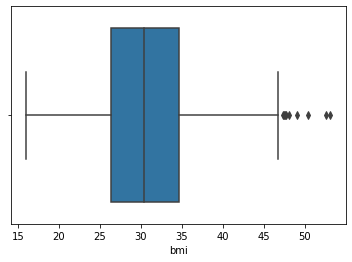

In [20]:
sns.boxplot(x=insurance_data['bmi'])   # box plot for checking outliers in the bmi column

(array([573.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

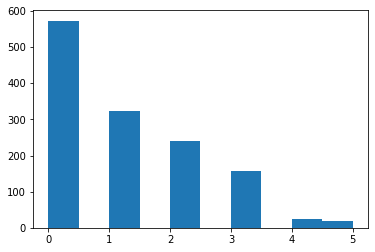

In [21]:
plt.hist(insurance_data['children']) #distribution of children column

(array([662.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 675.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

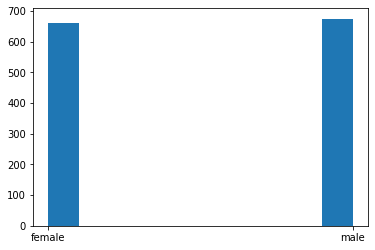

In [22]:
plt.hist(insurance_data['sex']) #distribution of sex column

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1063.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

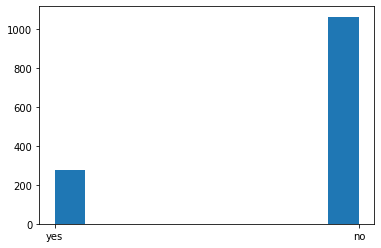

In [23]:
plt.hist(insurance_data['smoker']) #distribution of smoker column

(array([325.,   0.,   0., 364.,   0.,   0., 324.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

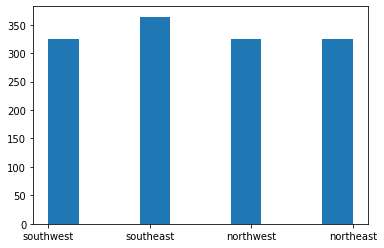

In [24]:
plt.hist(insurance_data['region']) #distribution of region column

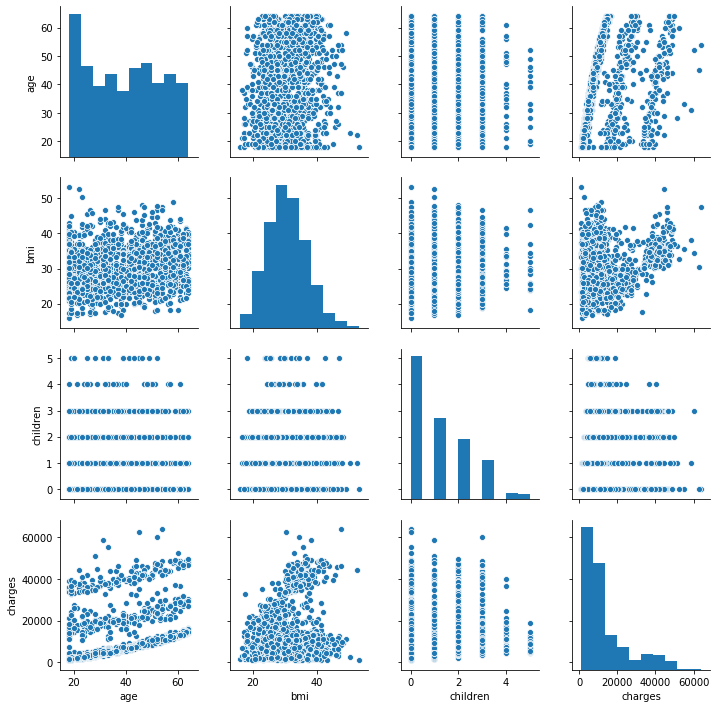

In [25]:
sns.pairplot(insurance_data) # Overall distributions using pairplot

### Do charges of people who smoke differ significantly from the people who don't?

$H_0$: Mean charge of smokers = Mean charge of non-smokers

$H_A$: Mean charge of smokers != Mean charge of non-smokers

Taking significance level α = 0.05

In [26]:
insurance_data.groupby('smoker')[['charges']].count()

,charges
smoker,
no,1063
yes,274


In [27]:
insurance_data.groupby('smoker')[['charges']].mean()

,charges
smoker,
no,8440.660307
yes,32050.231832


#### Observation: 
1. Number of people who smoke is 274 and number of people who don't smoke is 1063
2. Mean charge for a person who smokes is 32050, whereas mean charge for a person who doesn't smoke is 8440

#### Splitting the data into smokers and non smokers

In [28]:
insurance_data_smokers = insurance_data[insurance_data["smoker"] == "yes"]
insurance_data_smokers.shape

(274, 7)

In [29]:
insurance_data_nonsmokers = insurance_data[insurance_data["smoker"] == "no"]
insurance_data_nonsmokers.shape

(1063, 7)

In [30]:
import numpy as np
from scipy.stats import ttest_ind

In [31]:
t_statistic, p_value = ttest_ind(insurance_data_smokers['charges'], insurance_data_nonsmokers['charges'])
if p_value < 0.05:
    print("p-value ",p_value," is less than significance level (0.05), hence we can reject null. ")
    print("Therefore insurance charges of people who smoke differ significantly from the people who don't smoke")
else:
    print("p-value ",p_value," is more than significance level (0.05), hence we cannot reject null. ")
    print("Therefore insurance charges of people who smoke doesn't differ significantly from the people who don't smoke")

p-value  1.4067220949376498e-282  is less than significance level (0.05), hence we can reject null. 
Therefore insurance charges of people who smoke differ significantly from the people who don't smoke



### Does bmi of males differ significantly from that of females?

$H_0$: Mean bmi of males = Mean bmi of females

$H_A$: Mean bmi of males != Mean bmi of females

Taking significance level α = 0.05

In [32]:
insurance_data.groupby('sex')[['bmi']].count()

,bmi
sex,
female,662
male,675


In [33]:
insurance_data.groupby('sex')[['bmi']].mean()

,bmi
sex,
female,30.377749
male,30.943652


#### Observation: 
1. Number of males is 675 and number of females is 662
2. Mean bmi of males is 30.94 and mean bmi of females is 30.37

In [34]:
insurance_data_males = insurance_data[insurance_data["sex"] == "male"]
insurance_data_males.shape

(675, 7)

In [35]:
insurance_data_females = insurance_data[insurance_data["sex"] == "female"]
insurance_data_females.shape

(662, 7)

In [36]:
t_statistic1, p_value1 = ttest_ind(insurance_data_males['bmi'], insurance_data_females['bmi'])
if p_value1 < 0.05:
    print("p-value ",p_value1," is less than significance level (0.05), hence we can reject null. ")
    print("Therefore BMI of males significantly differ from that of males")
else:
    print("p-value ",p_value1," is more than significance level (0.05), hence we cannot reject null. ")
    print("Therefore BMI of males does not significantly differ from that of males")

p-value  0.08991704324931137  is more than significance level (0.05), hence we cannot reject null. 
Therefore BMI of males does not significantly differ from that of males


### Is the proportion of smokers significantly different in different genders?

$H_0$ = The proportions of smokers among different genders are equal

$H_A$ = The two proportions of smokers among different genders are significantly different

Taking significance level α = 0.05

In [37]:
insurance_data.groupby(['sex','smoker']).count()

age  bmi  children  region  charges
sex    smoker                                     
female no      547  547       547     547      547
       yes     115  115       115     115      115
male   no      516  516       516     516      516
       yes     159  159       159     159      159

In [38]:
female_smokers=insurance_data[insurance_data["sex"] == "female"].smoker.value_counts()[1]
male_smokers=insurance_data[insurance_data["sex"] == "male"].smoker.value_counts()[1]
print(female_smokers,male_smokers)

115 159


In [39]:
males,females = insurance_data["sex"].value_counts()[0],insurance_data["sex"].value_counts()[1]
print(females,males)

662 675


In [40]:
female_smoke_proportion = round(female_smokers/females,2)
male_smoke_proportion = round(male_smokers/males,2)
print("Male Smoking Proportion is ",male_smoke_proportion)
print("Female Smoking Proportion is ",female_smoke_proportion)

Male Smoking Proportion is  0.24
Female Smoking Proportion is  0.17


#### Observation: Male proportion is higher than female proportion for smokers but need to check statistical evidence

In [41]:
from statsmodels.stats.proportion import proportions_ztest

stat, pvalue2 = proportions_ztest([female_smokers, male_smokers] , [females, males])

if pvalue2 < 0.05:
    print(f'p-value {round(pvalue2,4)} less than significant level (0.05), hence We reject the null')
    print("The two proportions of smokers among different genders are siginificantly different")
else:
    print(f'p-value {round(pvalue2,4)} greater than significant level (0.05), hence We fail to reject the null')
    print("The two proportions of smokers among different genders are equal")

p-value 0.0051 less than significant level (0.05), hence We reject the null
The two proportions of smokers among different genders are siginificantly different


#### Is the distribution of bmi across women with no children, one child and two children, the same ?

$H_0$ = Distribution of bmi across women with no children, one child and two children is the same 

$H_A$ = Distribution of bmi across women with no children, one child and two children is different

Taking significance level α = 0.05

In [42]:
insurance_data[(insurance_data["sex"] == "female")].children.value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [43]:
insurance_data_female_lt2child = insurance_data[(insurance_data["sex"] == "female") & (insurance_data["children"]<=2)]
insurance_data_female_lt2child.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [44]:
insurance_data_female_lt2child.groupby("children")[["bmi"]].mean()

,bmi
children,
0,30.361522
1,30.052658
2,30.649790


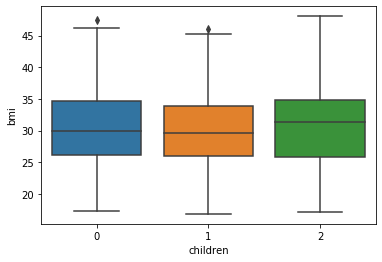

In [45]:
sns.boxplot(x = "children", y = "bmi", data = insurance_data_female_lt2child)

In [48]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('children ~ bmi', data = insurance_data_female_lt2child).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df         F   PR(>F)
bmi         0.043290    1.0  0.068411  0.79376
Residual  356.896639  564.0       NaN      NaN


In [47]:
print("p-value is greater than significance level (0.05), hence we cannot reject null")
print("Therefore the distribution of bmi across women with no children, one child and two children are the same")

p-value is greater than significance level (0.05), hence we cannot reject null
Therefore the distribution of bmi across women with no children, one child and two children are the same
